# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

C:\Users\SaadL\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: c:\Users\SaadL\OneDrive\المستندات\week4_task\Bus_Breakdown_and_Delays.csv

  0%|          | 0.00/34.4M [00:00<?, ?B/s]
  2%|▏         | 524k/34.4M [00:00<00:19, 1.78MB/s]
  5%|▍         | 1.57M/34.4M [00:00<00:07, 4.17MB/s]
 12%|█▏        | 4.19M/34.4M [00:00<00:02, 10.3MB/s]
 21%|██▏       | 7.34M/34.4M [00:00<00:01, 16.3MB/s]
 27%|██▋       | 9.44M/34.4M [00:00<00:02, 10.5MB/s]
 47%|████▋     | 16.3M/34.4M [00:01<00:01, 14.9MB/s]
 62%|██████▏   | 21.5M/34.4M [00:01<00:00, 20.9MB/s]
 72%|███████▏  | 24.6M/34.4M [00:01<00:00, 20.1MB/s]
 79%|███████▉  | 27.3M/34.4M [00:01<00:00, 19.2MB/s]
 87%|████████▋ | 29.9M/34.4M [00:01<00:00, 18.7MB/s]
 93%|█████████▎| 32.0M/34.4M [00:02<00

In [46]:
df = pd.read_csv(r"C:/Users/SaadL/OneDrive/المستندات/week4_task/Bus_Breakdown_and_Delays.csv")

## Importing Libraries

In [68]:
import pandas as pd 
import tensorflow as tf 
import keras
from keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [49]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [50]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [51]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

array([[<Axes: title={'center': 'Busbreakdown_ID'}>,
        <Axes: title={'center': 'Number_Of_Students_On_The_Bus'}>]],
      dtype=object)

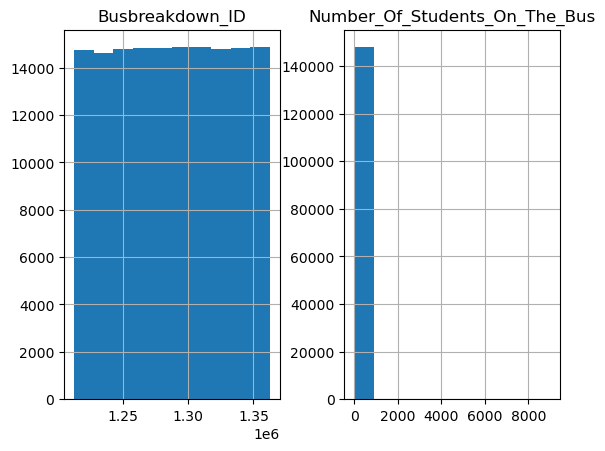

In [52]:
df.hist()

In [53]:
df.corr(numeric_only=True)

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


<Axes: >

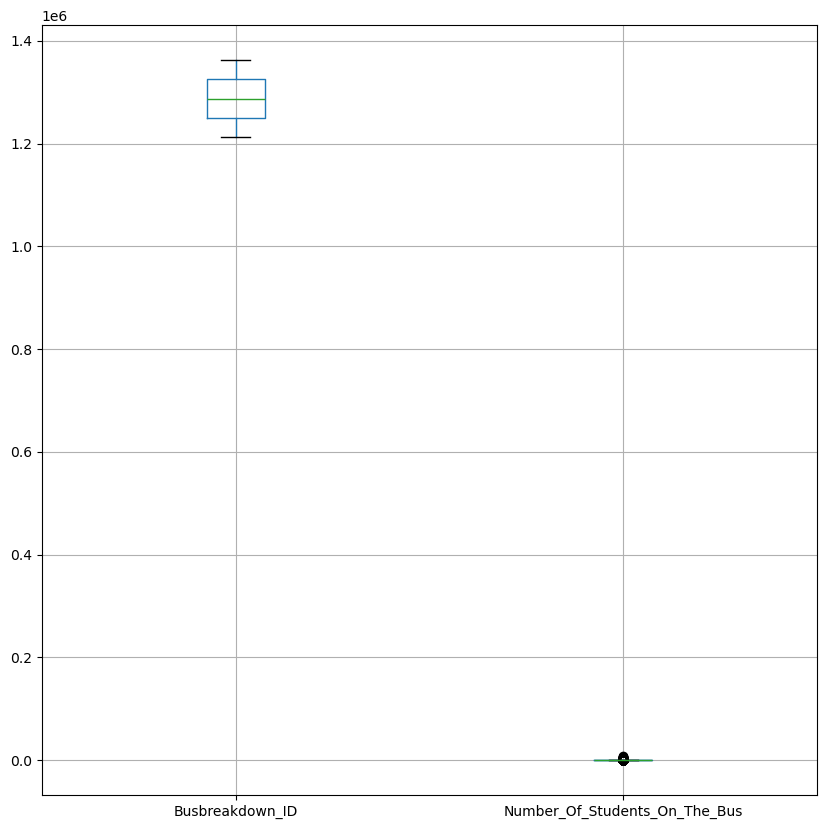

In [54]:
df.boxplot(figsize=(10,10))

<Axes: >

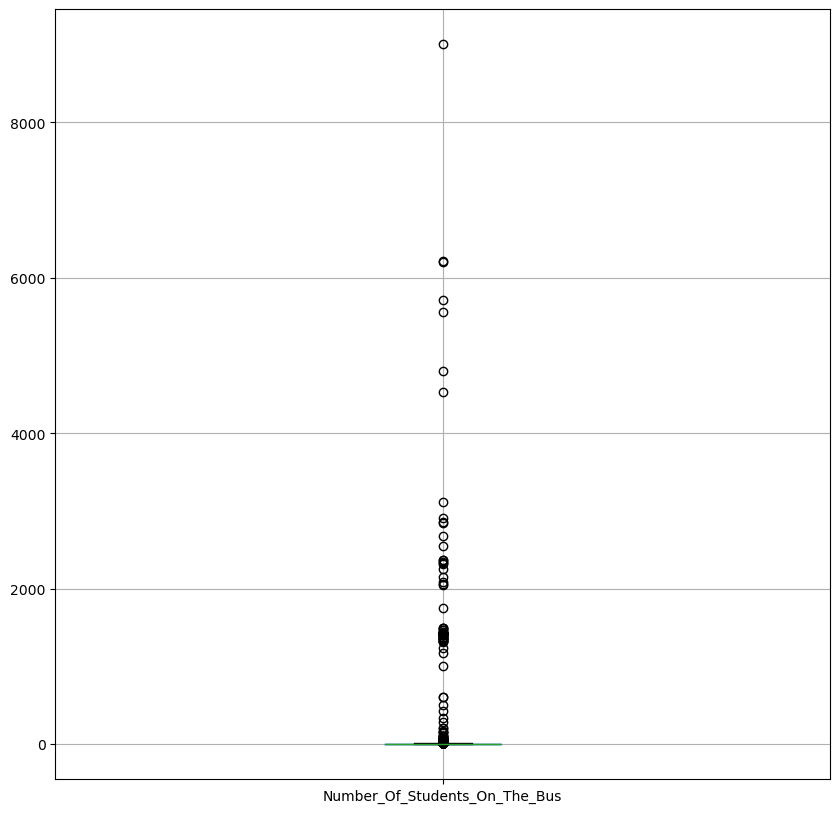

In [14]:
df.boxplot('Number_Of_Students_On_The_Bus',figsize=(10,10))

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [55]:
df.drop(columns=['Incident_Number','How_Long_Delayed','Boro','School_Year','Busbreakdown_ID','Run_Type'],inplace=True)

In [56]:
df.isnull().sum()

Bus_No                               0
Route_Number                        88
Reason                             102
Schools_Serviced                     0
Occurred_On                          0
Created_On                           0
Bus_Company_Name                     0
Number_Of_Students_On_The_Bus        0
Has_Contractor_Notified_Schools      0
Has_Contractor_Notified_Parents      0
Have_You_Alerted_OPT                 0
Informed_On                          0
Last_Updated_On                      0
Breakdown_or_Running_Late            0
School_Age_or_PreK                   0
dtype: int64

In [57]:
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])
df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])

In [58]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
Running Late    130857
Breakdown        17115
Name: count, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Breakdown_or_Running_Late'] = LE.fit_transform(df['Breakdown_or_Running_Late'])

In [64]:
df.sample(10)

,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
35402,18,W681,Other,75955,03/11/2016 07:29:00 AM,03/11/2016 07:29:00 AM,MAR-CAN TRANSPORT CO. INC,6,No,No,No,03/11/2016 07:29:00 AM,03/11/2016 07:29:24 AM,1,School-Age
63804,8000,R005,Heavy Traffic,31005,09/15/2016 07:52:00 AM,09/15/2016 07:53:00 AM,PIONEER TRANSPORTATION CO,0,Yes,No,No,09/15/2016 07:53:00 AM,09/15/2016 07:53:44 AM,1,School-Age
78457,2217,K650,Won`t Start,19036,11/10/2016 03:21:00 PM,11/10/2016 03:29:00 PM,"RELIANT TRANS, INC. (B232",0,Yes,Yes,Yes,11/10/2016 03:29:00 PM,11/10/2016 03:29:06 PM,1,School-Age
36267,90,W782,Flat Tire,75908,03/16/2016 06:54:00 AM,03/16/2016 06:55:00 AM,MAR-CAN TRANSPORT CO. INC,0,No,No,No,03/16/2016 06:55:00 AM,03/16/2016 06:55:41 AM,0,School-Age
74181,NI632,K016,Heavy Traffic,14435,10/25/2016 02:40:00 PM,10/25/2016 02:46:00 PM,"NEW DAWN TRANSIT, LLC (B2",0,No,No,No,10/25/2016 02:46:00 PM,10/25/2016 02:46:32 PM,1,School-Age
118550,08429,X837,Mechanical Problem,12450,04/19/2017 06:40:00 AM,04/19/2017 06:49:00 AM,HOYT TRANSPORTATION CORP.,0,Yes,Yes,No,04/19/2017 06:49:00 AM,04/19/2017 06:49:24 AM,0,School-Age
15087,594,L986,Other,20201,12/07/2015 07:16:00 AM,12/07/2015 07:20:00 AM,HAPPY CHILD TRANS LLC (B2,2,Yes,Yes,No,12/07/2015 07:20:00 AM,12/07/2015 07:20:16 AM,1,School-Age
145872,1703,K8331,Heavy Traffic,14071,03/20/2017 07:20:00 AM,03/20/2017 07:22:00 AM,ALLIED TRANSIT CORP.,1,Yes,Yes,No,03/20/2017 07:22:00 AM,03/20/2017 07:22:49 AM,1,School-Age
40469,1455,M619,Heavy Traffic,01400,04/07/2016 06:16:00 AM,04/07/2016 06:17:00 AM,LEESEL TRANSP CORP (B2192,1,Yes,Yes,No,04/07/2016 06:17:00 AM,04/07/2016 06:17:48 AM,1,School-Age
24750,1005,X2139,Weather Conditions,07256,01/25/2016 08:03:00 AM,01/25/2016 08:09:00 AM,PIONEER TRANSPORTATION CO,2,Yes,No,No,01/25/2016 08:09:00 AM,01/25/2016 08:09:29 AM,1,School-Age


In [66]:
df['Reason'].value_counts()

Reason
Heavy Traffic                  87528
Other                          21666
Mechanical Problem             13908
Won`t Start                     7277
Flat Tire                       4585
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1446
Accident                        1367
Name: count, dtype: int64

In [69]:
df['Reason'] = df['Reason'].replace({'Other':np.NaN})


In [75]:
df.isnull().sum()

Bus_No                                 0
Route_Number                           0
Reason                             21666
Schools_Serviced                       0
Occurred_On                            0
Created_On                             0
Bus_Company_Name                       0
Number_Of_Students_On_The_Bus          0
Has_Contractor_Notified_Schools        0
Has_Contractor_Notified_Parents        0
Have_You_Alerted_OPT                   0
Informed_On                            0
Last_Updated_On                        0
Breakdown_or_Running_Late              0
School_Age_or_PreK                     0
dtype: int64

In [70]:
df['Reason'].value_counts()

Reason
Heavy Traffic                  87528
Mechanical Problem             13908
Won`t Start                     7277
Flat Tire                       4585
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1446
Accident                        1367
Name: count, dtype: int64

In [76]:
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])

In [77]:
df['Reason'].value_counts()

Reason
Heavy Traffic                  109194
Mechanical Problem              13908
Won`t Start                      7277
Flat Tire                        4585
Weather Conditions               4527
Late return from Field Trip      3464
Problem Run                      2204
Delayed by School                1446
Accident                         1367
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df['Reason'] = MMS.fit_transform(df['Reason'])

ValueError: could not convert string to float: 'Heavy Traffic'

In [41]:
df.duplicated().sum()

36

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().sum()

0

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [82]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train

,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,School_Age_or_PreK
125215,1604,M486,Heavy Traffic,01063,05/09/2017 05:50:00 AM,05/09/2017 05:51:00 AM,LEESEL TRANSP CORP (B2192,0,Yes,Yes,No,05/09/2017 05:51:00 AM,05/09/2017 05:51:43 AM,School-Age
100551,43245,N483,Mechanical Problem,75907,02/07/2017 07:15:00 AM,02/07/2017 07:21:00 AM,"BORO TRANSIT, INC.",0,Yes,Yes,Yes,02/07/2017 07:21:00 AM,02/07/2017 07:21:59 AM,School-Age
99302,5108,B0909B,Heavy Traffic,C262,02/01/2017 09:00:00 AM,02/01/2017 09:07:00 AM,L & M BUS CORP.,4,Yes,Yes,Yes,02/01/2017 09:07:00 AM,02/01/2017 09:44:33 AM,Pre-K
114617,8955D,P515,Won`t Start,26440,03/29/2017 02:56:00 PM,03/29/2017 02:57:00 PM,LOGAN BUS COMPANY INC.,0,Yes,Yes,No,03/29/2017 02:57:00 PM,03/29/2017 02:57:17 PM,School-Age
68770,1222,Q402,Heavy Traffic,30008,09/29/2016 08:10:00 AM,09/29/2016 08:13:00 AM,HOYT TRANSPORTATION CORP.,7,Yes,Yes,No,09/29/2016 08:13:00 AM,09/29/2016 08:13:48 AM,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,39,M260,Heavy Traffic,02909,04/21/2017 01:57:00 PM,04/21/2017 02:02:00 PM,CAREFUL BUS,0,Yes,No,No,04/21/2017 02:02:00 PM,04/21/2017 02:02:33 PM,School-Age
103694,2590,X9261,Late return from Field Trip,11003,02/16/2017 02:47:00 PM,02/16/2017 02:56:00 PM,BOBBY`S BUS CO. INC.,0,No,Yes,No,02/16/2017 02:56:00 PM,02/16/2017 02:57:23 PM,School-Age
131932,1222,Q2974,Mechanical Problem,29095,05/30/2017 06:33:00 AM,05/30/2017 06:33:00 AM,QUALITY TRANSPORTATION CO,0,No,No,No,05/30/2017 06:33:00 AM,05/30/2017 07:03:59 AM,School-Age
146867,48192,Q471,Heavy Traffic,27351,06/01/2017 07:56:00 AM,06/01/2017 08:06:00 AM,"BORO TRANSIT, INC.",0,Yes,Yes,Yes,06/01/2017 08:06:00 AM,06/01/2017 08:06:38 AM,School-Age


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [89]:
model = Sequential()

In [90]:
[
    model.add(Dense(units=16, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu')),
    model.add(Dense(units=16, activation='relu')),
    model.add(Dense(units=1, activation='sigmoid'))

]

c:\Users\SaadL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[None, None, None]

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [98]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [95]:
print(X_train.dtype)
print(y_train.dtype)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [94]:
X_train = np.array(X_train, dtype='float32')
y_train = np.array(y_train, dtype='int32') 

ValueError: could not convert string to float: '8955D'

In [92]:
model.fit(X_train , y_train , batch_size=100 , epochs=100 , validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('week4_task.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: